In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plotter


In [70]:
url = 'https://raw.githubusercontent.com/shravanc/datasets/master/bq-results-20200507-161505-3qbbuf2p2f3d.csv'
df = pd.read_csv(url)
df.head(5)

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,20673f3890699af8773ff17dcf6be1d085849d29,df0730de65d455fc451fcb38dd627f877943cf490f5719...,2015-06-16 12:45:00 UTC,2015-06-16 12:45:00 UTC,0,0.0,NaN,NaN,NaN,NaN,4.45,0.89,0,0.0,5.34,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,NaN,NaN,NaN,NaN
1,7ce80b3454ceb7d17c7b9129189eb8589d8a078a,6134198478cbb4036810920580fb810895aac6beefdb35...,2015-06-01 18:00:00 UTC,2015-06-01 18:30:00 UTC,1500,0.0,NaN,NaN,NaN,NaN,18.45,0.00,0,0.0,18.45,Cash,Dispatch Taxi Affiliation,NaN,NaN,NaN,NaN,NaN,NaN
2,582f8e5513a72067e3e8506ddb75efcdb895131f,b9632eb791cbe59186d994429adcca3bc62c7156ce3464...,2015-06-27 19:30:00 UTC,2015-06-27 19:30:00 UTC,0,0.0,NaN,NaN,NaN,NaN,20.05,5.00,0,0.0,25.05,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,NaN,NaN,NaN,NaN
3,55145e64c7ed5c19f5a6e3547977ee7ea1f2247d,a8107c5481ea5eed4d6fa93cd1648f3f69c6822a6fff49...,2015-06-27 22:45:00 UTC,2015-06-27 22:45:00 UTC,0,0.0,NaN,NaN,NaN,NaN,7.85,2.36,0,0.0,10.21,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,NaN,NaN,NaN,NaN
4,2a79608e185ace464535511fa7a95e43fa06135f,7f8be35bf085d7490245401fe27b274624245d8e76ae11...,2015-09-01 17:15:00 UTC,2015-09-01 17:15:00 UTC,0,0.0,NaN,NaN,NaN,NaN,38.85,9.71,0,0.0,48.56,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
count,1000.000000,1000.000000,0.0,0.0,0.0,0.0,1000.000000,1000.00000,1000.0,1000.00000,1000.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,94.980000,0.228900,NaN,NaN,NaN,NaN,17.379220,2.89196,0.0,0.30325,20.574430,NaN,NaN,NaN,NaN,NaN,NaN
std,561.815304,1.645668,NaN,NaN,NaN,NaN,14.701652,2.83233,0.0,3.39914,16.974299,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.00000,0.0,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,0.000000,NaN,NaN,NaN,NaN,7.450000,1.21000,0.0,0.00000,8.940000,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,0.000000,NaN,NaN,NaN,NaN,10.450000,2.00000,0.0,0.00000,12.300000,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,0.000000,NaN,NaN,NaN,NaN,26.050000,3.91250,0.0,0.00000,30.642500,NaN,NaN,NaN,NaN,NaN,NaN
max,14400.000000,23.700000,NaN,NaN,NaN,NaN,128.650000,25.73000,0.0,71.00000,154.380000,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
df.isna().sum()

unique_key                   0
taxi_id                      0
trip_start_timestamp         0
trip_end_timestamp           0
trip_seconds                 0
trip_miles                   0
pickup_census_tract       1000
dropoff_census_tract      1000
pickup_community_area     1000
dropoff_community_area    1000
fare                         0
tips                         0
tolls                        0
extras                       0
trip_total                   0
payment_type                 0
company                      0
pickup_latitude           1000
pickup_longitude          1000
pickup_location           1000
dropoff_latitude          1000
dropoff_longitude         1000
dropoff_location          1000
dtype: int64

In [0]:
columns_to_remove = ['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp']
empty_columns = ['pickup_census_tract', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'pickup_latitude', 'pickup_longitude', 'pickup_location', 'dropoff_latitude', 'dropoff_longitude', 'dropoff_location']

In [74]:
df = df.drop(columns_to_remove, axis=1)
df = df.drop(empty_columns, axis=1)
df.head()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,payment_type,company
0,0,0.0,4.45,0.89,0,0.0,5.34,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag
1,1500,0.0,18.45,0.00,0,0.0,18.45,Cash,Dispatch Taxi Affiliation
2,0,0.0,20.05,5.00,0,0.0,25.05,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag
3,0,0.0,7.85,2.36,0,0.0,10.21,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag
4,0,0.0,38.85,9.71,0,0.0,48.56,Credit Card,Chicago Elite Cab Corp. (Chicago Carriag


In [75]:
df['company'].value_counts()

Chicago Elite Cab Corp. (Chicago Carriag    753
Suburban Dispatch LLC                        82
T.A.S. - Payment Only                        59
Blue Ribbon Taxi Association Inc.            31
Choice Taxi Association                      27
Taxi Affiliation Services                    23
Dispatch Taxi Affiliation                     9
Top Cab Affiliation                           6
Northwest Management LLC                      5
Chicago Medallion Management                  4
4787 - 56058 Reny Cab Co                      1
Name: company, dtype: int64

In [76]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total,payment_type_Credit Card,payment_type_Dispute,payment_type_No Charge,company_Blue Ribbon Taxi Association Inc.,company_Chicago Elite Cab Corp. (Chicago Carriag,company_Chicago Medallion Management,company_Choice Taxi Association,company_Dispatch Taxi Affiliation,company_Northwest Management LLC,company_Suburban Dispatch LLC,company_T.A.S. - Payment Only,company_Taxi Affiliation Services,company_Top Cab Affiliation
0,0,0.0,4.45,0.89,0,0.0,5.34,1,0,0,0,1,0,0,0,0,0,0,0,0
1,1500,0.0,18.45,0.00,0,0.0,18.45,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0.0,20.05,5.00,0,0.0,25.05,1,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0.0,7.85,2.36,0,0.0,10.21,1,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0.0,38.85,9.71,0,0.0,48.56,1,0,0,0,1,0,0,0,0,0,0,0,0


In [77]:
df.isna().sum()

trip_seconds                                        0
trip_miles                                          0
fare                                                0
tips                                                0
tolls                                               0
extras                                              0
trip_total                                          0
payment_type_Credit Card                            0
payment_type_Dispute                                0
payment_type_No Charge                              0
company_Blue Ribbon Taxi Association Inc.           0
company_Chicago Elite Cab Corp. (Chicago Carriag    0
company_Chicago Medallion Management                0
company_Choice Taxi Association                     0
company_Dispatch Taxi Affiliation                   0
company_Northwest Management LLC                    0
company_Suburban Dispatch LLC                       0
company_T.A.S. - Payment Only                       0
company_Taxi Affiliation Ser

In [0]:
X = df.drop('fare', 1)
y = df['fare']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [82]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.61790143e-01, 1.06081566e-01, 8.58149472e-02, 7.85808694e-02,
       7.12010665e-02, 6.16974941e-02, 5.95120445e-02, 5.68446350e-02,
       5.60332453e-02, 5.56509003e-02, 5.54503636e-02, 5.46523189e-02,
       3.49920180e-02, 2.11459847e-02, 1.82880188e-02, 1.25997096e-02,
       9.49789670e-03, 1.66778896e-04, 1.80412026e-34])

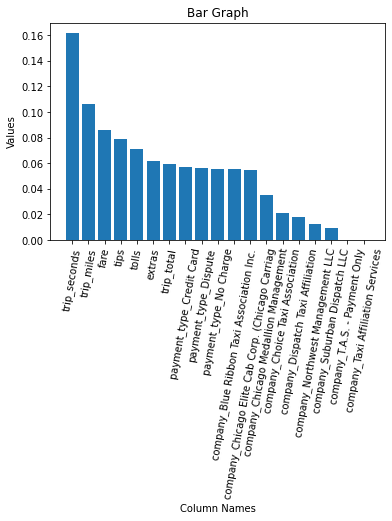

In [94]:
columnNames = list(df.keys())
plotter.xticks(range(len(explained_variance)), columnNames)
plotter.xlabel('Column Names') 
plotter.ylabel('Values') 
plotter.title('Bar Graph') 
plotter.xticks(rotation=80) 
plotter.bar(range(len(explained_variance)), explained_variance)  

plotter.show()

Removing last three columns

In [0]:
n_components = len(df.keys()) - 4

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [103]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.16181713, 0.10609926, 0.08582926, 0.07859398, 0.07121294,
       0.06170779, 0.05952197, 0.05685412, 0.05604259, 0.05566018,
       0.05545961, 0.05466144, 0.03499785, 0.02114951, 0.01829107,
       0.01260181])

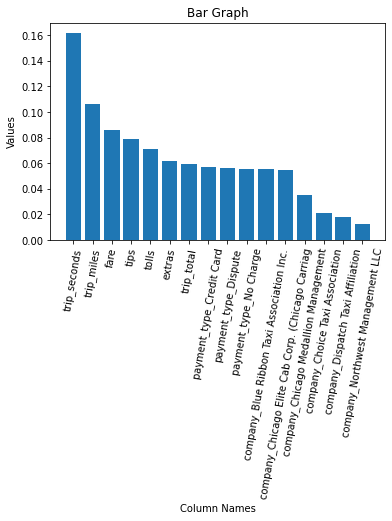

In [104]:
columnNames = list(df.keys())
plotter.xticks(range(len(explained_variance)), columnNames)
plotter.xlabel('Column Names') 
plotter.ylabel('Values') 
plotter.title('Bar Graph') 
plotter.xticks(rotation=80) 
plotter.bar(range(len(explained_variance)), explained_variance)  

plotter.show()

In [93]:
X_train

array([[ 8.93969343e-01, -2.14228474e+00,  1.18462445e+00, ...,
         1.98763749e+00,  9.10953376e-01, -7.69544581e-01],
       [ 9.09112597e-01, -4.06856096e-01,  1.03280723e+00, ...,
         2.53962743e+00,  9.74603602e-01,  9.82614122e-01],
       [-6.58986978e-01, -6.47613270e-01,  4.41974865e-01, ...,
        -4.78233236e-02,  1.27394280e-02, -2.34385540e-02],
       ...,
       [-9.92697734e-01,  2.49191524e+00,  2.87206654e-01, ...,
         8.47867910e-02, -7.82354260e-02, -3.83817295e-01],
       [ 3.22685112e-01,  1.91844756e+00, -2.83093785e+00, ...,
         2.03121163e-01,  5.82562461e-02, -1.01910025e-01],
       [ 4.28500652e-01,  3.90156817e-01, -2.73679753e+00, ...,
         2.75757732e-03,  7.02160369e-02, -4.80110671e-01]])

In [0]:
train_dataset = pd.DataFrame(X_train)
train_dataset.to_csv('train_dataset.csv')

In [0]:
test_dataset = pd.DataFrame(X_train)
test_dataset.to_csv('test_dataset.csv')

In [0]:
y_train.to_csv('CS6502_y_train.csv')
y_test.to_csv('CS6502_y_test.csv')

Code To Download CSV Files

In [0]:
# from google.colab import files
# files.download('train_dataset.csv')
# files.download('test_dataset.csv') 

# files.download('CS6502_y_train.csv')
# files.download('CS6502_y_test.csv') 